In [26]:
# Setup
import matplotlib.pyplot as plt
import pandas as pd
import random

In [109]:
# Making placeholders for data
day = []
humidity = []
temperature = []

In [110]:
# Creating data with patterns (using a linear model and adding noise)

random.seed(67)

def noisy_linear_function(slope:float, bias:float, x:int, noise:float):
  return slope*x + bias + random.uniform(-1*noise, noise)

# Temperature parameters
temp_slope, temp_bias, temp_noise = 0.1, 19, 1 # Bias should correspond with the usual minimal temperature data

# Humidity parameters
humid_slope, humid_bias, humid_noise = 0.2, 10, 1 # Bias should correspond with usual minimal humidity

for day_unit in range(1, 51):
  day.append(day_unit) # Create points for days
  # Create noisy but patterned temperature data
  temp = noisy_linear_function(slope=temp_slope, bias=temp_bias, x=day_unit, noise=temp_noise)
  temperature.append(round(temp, 2))

   # Create noisy but patterned temperature data
  humid = noisy_linear_function(slope=humid_slope, bias=humid_bias, x=day_unit, noise=humid_noise)
  humidity.append(round(humid,2))

In [111]:
# Checking data
print(f"Days: {day}")
print(f"humidity (%): {humidity}")
print(f"temperature (C): {temperature}")

Days: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
humidity (%): [10.73, 10.23, 10.46, 11.64, 10.08, 10.27, 10.65, 11.22, 12.56, 12.3, 12.67, 11.71, 11.61, 13.33, 13.3, 12.98, 13.12, 14.22, 14.51, 13.05, 14.94, 14.87, 14.39, 15.54, 14.27, 15.28, 16.3, 15.69, 14.93, 15.76, 16.95, 15.68, 16.57, 16.76, 17.17, 17.56, 17.99, 17.9, 16.95, 17.92, 17.78, 18.73, 19.4, 17.83, 19.02, 19.45, 18.52, 19.05, 20.31, 20.92]
temperature (C): [18.25, 20.14, 20.19, 19.64, 18.91, 18.95, 19.58, 18.99, 19.7, 19.03, 20.91, 19.52, 20.04, 21.34, 21.12, 21.57, 19.78, 20.67, 19.91, 20.7, 21.31, 21.42, 21.18, 20.45, 21.65, 20.98, 22.08, 21.65, 22.3, 22.92, 23.07, 22.88, 22.21, 22.03, 22.11, 23.03, 23.31, 22.52, 23.44, 23.35, 22.38, 23.74, 23.38, 23.6, 23.79, 24.17, 24.22, 24.18, 23.2, 24.63]


In [112]:
# Insert data into dictionary to be read by pandas
data = {
    "days": day,
    "humidity(%)": humidity,
    "temperature(C)": temperature
    }

In [113]:
df = pd.DataFrame(data)
df

,days,humidity(%),temperature(C)
0,1,10.73,18.25
1,2,10.23,20.14
2,3,10.46,20.19
3,4,11.64,19.64
4,5,10.08,18.91
5,6,10.27,18.95
6,7,10.65,19.58
7,8,11.22,18.99
8,9,12.56,19.70
9,10,12.30,19.03


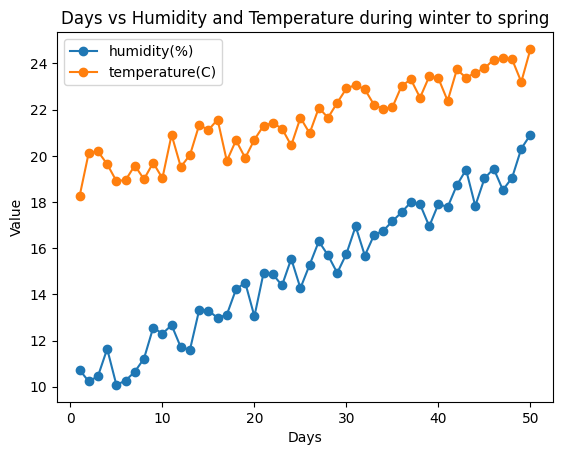

In [114]:
df.plot(x="days", y=["humidity(%)", "temperature(C)"], marker='o')
plt.title("Days vs Humidity and Temperature during winter to spring")
plt.xlabel("Days")
plt.ylabel("Value")
plt.show()

In [115]:
df.to_csv("data.csv", index=False)